1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [339]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import tree

# Load in the data
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv ')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [340]:
# Covert it to dummy variable
df_default = pd.get_dummies(df['default'])
df_student = pd.get_dummies(df['student'])

# Concatenate dummy variable with original data 
df_final = pd.concat([df[['default','student','balance','income']],df_default,df_student],axis=1)
df_final.columns = ['default','student','balance','income','defaultNo','defaultYes','studentNo','studentYes']
df_final.head()

,default,student,balance,income,defaultNo,defaultYes,studentNo,studentYes
0,No,No,729.526495,44361.625074,1,0,1,0
1,No,Yes,817.180407,12106.134700,1,0,0,1
2,No,No,1073.549164,31767.138947,1,0,1,0
3,No,No,529.250605,35704.493935,1,0,1,0
4,No,No,785.655883,38463.495879,1,0,1,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

Text(0.5,1,'balance')

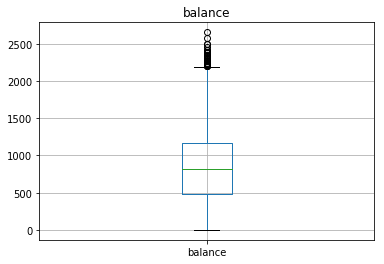

In [341]:
#Plot boxplot for balance
df[['balance']].boxplot()
plt.title("balance")

Text(0.5,1,'income')

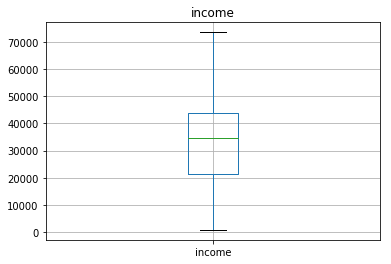

In [342]:
# Plot boxplot for income
df[['income']].boxplot()
plt.title("income")

Text(0.5,1,'Student')

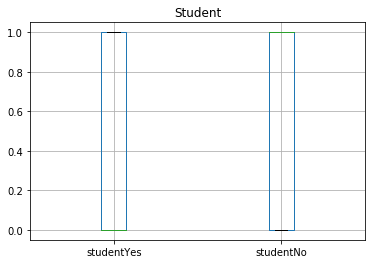

In [343]:
#Plot boxplot for student
df_final[['studentYes','studentNo']].boxplot()
plt.title("Student")

## The green line shows true value, most of people from this data is not student
## Note that only a small portion of subjects from the data are students

Text(0.5,1,'Default')

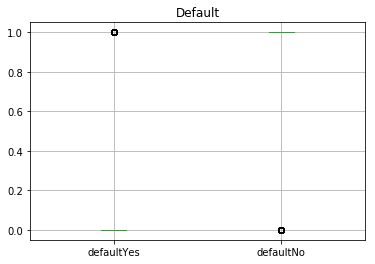

In [344]:
#Plot boxplot for default
df_final[['defaultYes','defaultNo']].boxplot()
plt.title("Default")

##Note, only a small portion of subjects default on their loans

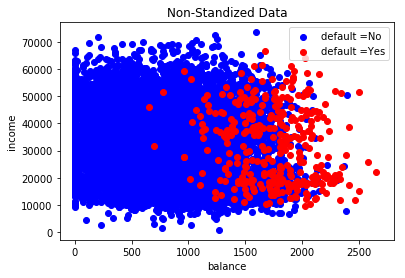

In [345]:
# Plot the scatter plot to visulize the balance vs income and colored code with the variable default
plt.scatter(df[df.default == 'No']['balance'], df[df.default == 'No']['income'], color='blue', label='default =No')
plt.scatter(df[df.default == 'Yes']['balance'], df[df.default == 'Yes']['income'], color='red', label='default =Yes')
plt.xlabel("balance")
plt.ylabel("income")
plt.title("Non-Standized Data")
plt.legend(loc='upper right')  
plt.show()

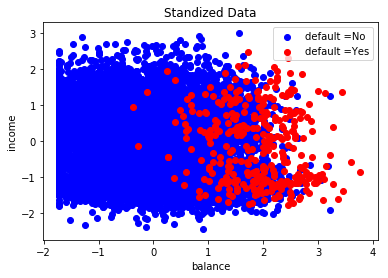

,Stdbalance,Stdincome,StddefaultNo,StddefaultYes,StdstudentNo,StdstudentYes
0,-0.218835,0.813187,0.185599,-0.185599,0.645936,-0.645936
1,-0.037616,-1.605496,0.185599,-0.185599,-1.548141,1.548141
2,0.492410,-0.131212,0.185599,-0.185599,0.645936,-0.645936
3,-0.632893,0.164031,0.185599,-0.185599,0.645936,-0.645936
4,-0.102791,0.370915,0.185599,-0.185599,0.645936,-0.645936


In [346]:
# Standardize the data
X_standardized = preprocessing.scale(df_final[['balance','income','defaultNo','defaultYes','studentNo','studentYes']])
X_standardized.std(axis=0)
Newdf = pd.DataFrame(data = X_standardized)
Newdf.columns = ['Stdbalance','Stdincome','StddefaultNo','StddefaultYes','StdstudentNo','StdstudentYes']

# Plot the standardized data
plt.scatter(Newdf[Newdf['StddefaultYes'] <= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] <= 0]['Stdincome'], color='blue', label='default =No')
plt.scatter(Newdf[Newdf['StddefaultYes'] >= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] >= 0]['Stdincome'], color='red', label='default =Yes')
plt.xlabel("balance")
plt.ylabel("income")
plt.title("Standized Data")
plt.legend(loc='upper right')  
plt.show()

Newdf.head()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [388]:
## This following only contains student data since the question ask for to predict if a student defaults on their loan

# Train and output score for student defaults applying logistic regression with only balance and income data
y = df_final[df_final.student =='Yes']['defaultYes']
X = Newdf[Newdf.StdstudentYes >=0][['Stdbalance','Stdincome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression for Classification
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
score = logisticRegr.score(X_test, y_test)
print(score)
logisticRegr.coef_

0.95415959253


array([[ 2.19985677,  0.86720907]])

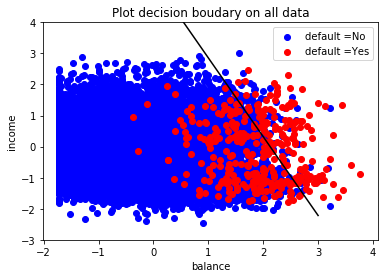

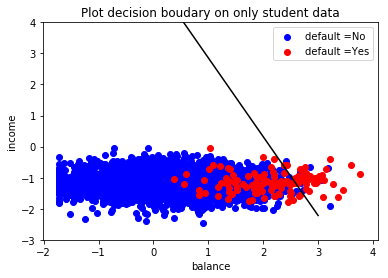

In [389]:
# Plot the decision boundary and the original scatter plot
coef1 = logisticRegr.coef_[0,0]
coef2 = logisticRegr.coef_[0,1]
intercept = logisticRegr.intercept_
Balance = range(4)
Income = (Balance *coef1+intercept)/(-1*coef2)

# Plot the figure on figure from problem 3
plt.scatter(Newdf[Newdf['StddefaultYes'] <= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] <= 0]['Stdincome'], color='blue', label='default =No')
plt.scatter(Newdf[Newdf['StddefaultYes'] >= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] >= 0]['Stdincome'], color='red', label='default =Yes')
plt.plot(Balance,Income,'k')
plt.xlabel("balance")
plt.ylabel("income")
plt.title("Plot decision boudary on all data")
plt.legend(loc='upper right')  
plt.ylim((-3,4))
plt.show()

# Plot the figure on only student data
studentdf = Newdf[Newdf['StdstudentYes'] >= 0]

plt.scatter(studentdf[studentdf['StddefaultYes'] <= 0]['Stdbalance'], studentdf[studentdf['StddefaultYes'] <= 0]['Stdincome'], color='blue', label='default =No')
plt.scatter(studentdf[studentdf['StddefaultYes'] >= 0]['Stdbalance'], studentdf[studentdf['StddefaultYes'] >= 0]['Stdincome'], color='red', label='default =Yes')
plt.plot(Balance,Income,'k')
plt.xlabel("balance")
plt.ylabel("income")
plt.title("Plot decision boudary on only student data")
plt.legend(loc='upper right') 
plt.ylim((-3,4))
plt.show()

Area under the ROC curve : 0.966345


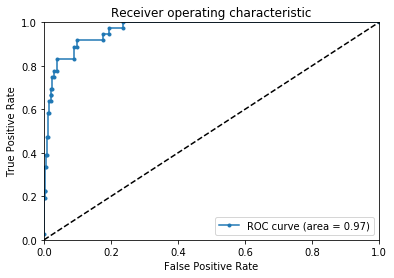

In [390]:
# Plot AUC ROC
def generate_auc(clf_class,**kwargs):
    # Construct a kfolds object
    #random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    #n_samples, n_features = X.shape
    #half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,roc_auc, thresholds = generate_auc(LogisticRegression)


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


In [391]:
## Create training and testing set for all calssifiers below for consistency
y = df_final['defaultYes']
X = Newdf[['Stdbalance','Stdincome','StdstudentYes']]
X_trainT, X_testT, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [392]:
## This is classification with only balance and income for all data
# Train and output score for student defaults applying logistic regression with only balance and income data
X_train = X_trainT[['Stdbalance','Stdincome']]
X_test = X_testT[['Stdbalance','Stdincome']]


# Logistic Regression for Classification
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
score = logisticRegr.score(X_test, y_test)
print(score)
logisticRegr.coef_

0.9735


array([[ 2.5490302 ,  0.22342932]])

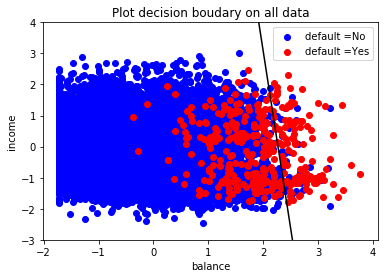

In [393]:
# Plot the decision boundary and the original scatter plot
coef1 = logisticRegr.coef_[0,0]
coef2 = logisticRegr.coef_[0,1]
intercept = logisticRegr.intercept_
Balance = range(4)
Income = (Balance *coef1+intercept)/(-1*coef2)

# Plot the figure
plt.scatter(Newdf[Newdf['StddefaultYes'] <= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] <= 0]['Stdincome'], color='blue', label='default =No')
plt.scatter(Newdf[Newdf['StddefaultYes'] >= 0]['Stdbalance'], Newdf[Newdf['StddefaultYes'] >= 0]['Stdincome'], color='red', label='default =Yes')
plt.plot(Balance,Income,'k')
plt.xlabel("balance")
plt.ylabel("income")
plt.title("Plot decision boudary on all data")
plt.legend(loc='upper right')  
plt.ylim((-3,4))
plt.show()


Area under the ROC curve : 0.953647


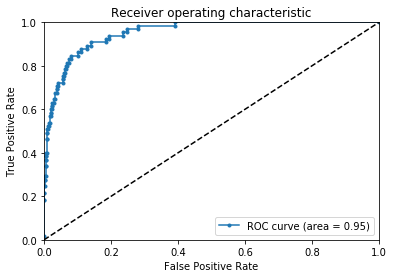

In [394]:
# Plot AUC ROC
def generate_auc(clf_class,**kwargs):
    # Construct a kfolds object
    #random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    #n_samples, n_features = X.shape
    #half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,roc_auc, thresholds = generate_auc(LogisticRegression)


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable? 
Answer:The performance increased just a little with addition of student variable and ridge optimization, but not much. However, we are not sure if the increase of performance is from the addition of student variable or the ridge regularization.

From question 4, the performance with student only data was actually better compared to all data with or witout student variable. However, the conclusion can not be draw for sure since the testing and training data are not exately the same. 

Note that the performance varies with different split of training and testing data. 

In [395]:
# Inclue the student variable into the data
X_train = X_trainT
X_test = X_testT

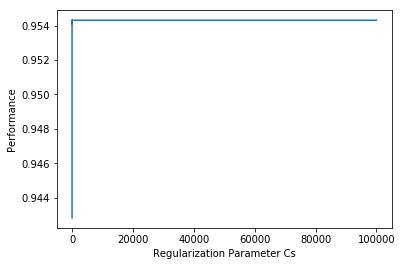

The regularization strength which optimizes performance: 0.890215
Optimized Performance Score AUC: 0.954307


LogisticRegression(C=0.89021508544503924, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [396]:
# Optimize the Logistic Regression with L2 penalty (Ridge Regression)
# Range of C tested, bigger range was tested, these C values are the ones make difference
Cs = np.logspace(-5,5,100)
scores = []
for C in Cs:
    logisticRegr = LogisticRegression(C = C,penalty = 'l2')
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = logisticRegr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(Cs,scores)
plt.xlabel('Regularization Parameter Cs')
plt.ylabel('Performance')
plt.show()

Optim_C = Cs[scores.index(max(scores))]
# Output the Cs for the with maximum score
print ('The regularization strength which optimizes performance: %.6f' %Optim_C)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

# Use the optimized C value for logistic regression
logisticRegr3 = LogisticRegression(C = Optim_C,penalty = 'l2')
logisticRegr3.fit(X_train,y_train)

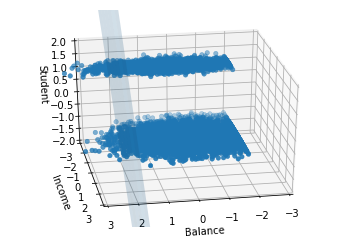

In [400]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
a = logisticRegr3.coef_[0,0]
b = logisticRegr3.coef_[0,1]
c = logisticRegr3.coef_[0,2]
normal = np.array([a,b,c])
d = logisticRegr3.intercept_
xx, yy = np.meshgrid(range(7), range(7))

plt3d = plt.figure().gca(projection='3d')

# Calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# Plot the hyperplane
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Plot the scatter plot
plt3d.scatter(Newdf[['Stdbalance']],Newdf[['Stdincome']],Newdf[['StdstudentYes']],cmap='viridis', linewidth=0.5)
plt3d.set_xlabel('Balance')
plt3d.set_ylabel('Income')
plt3d.set_zlabel('Student')
plt3d.set_zlim3d(-2, 2)                    
plt3d.set_ylim3d(-3, 3)                    
plt3d.set_xlim3d(-3, 3)
plt3d.view_init(azim = 80)

Area under the ROC curve : 0.954307


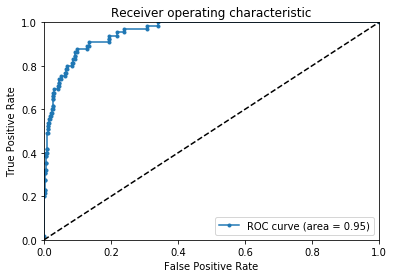

In [401]:
#Plot ROC and generate AUC to access performance
def generate_auc():
    # Construct a kfolds object
    #random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    #n_samples, n_features = X.shape
    #half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = LogisticRegression(C = Optim_C,penalty = 'l2')
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,roc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

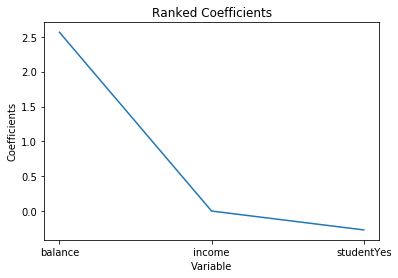

In [402]:
# Plot the ranked coefficient along with the variable name
coef = np.array([('balance',logisticRegr3.coef_[0,0]),('income',logisticRegr3.coef_[0,1]),('studentYes',logisticRegr3.coef_[0,2])],dtype=[('x', 'S10'), ('y', float)])
coef.sort(order = 'y')
plt.plot(coef['x'],coef['y'])
plt.xlabel('Variable')
plt.ylabel('Coefficients')
plt.title('Ranked Coefficients')
plt.show()

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset). Answer: Yes, it is robust since the performance is consistent over differnt runs.

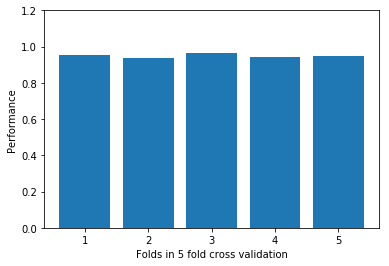

In [403]:
# Construct a kfolds object
from sklearn.cross_validation import KFold
kf = KFold(len(y),n_folds=5,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_train, X_test = X_matrix[train_index,:], X_matrix[test_index,:]
    y_train, y_test = y_matrix[train_index], y_matrix[test_index] 
    logisticRegr = LogisticRegression(C = Optim_C,penalty = 'l2')
    #logisticRegr.fit(X_train,y_train)
    #scores.append(logisticRegr.score(X_test,y_test))
    probas_ = logisticRegr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))
    
# Plot the figure
xaxis = range(5)+ np.ones(5)  
plt.bar(xaxis,scores)
plt.xlabel('Folds in 5 fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show()   

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

Answer: Performance is a little worse than logistic regression, but they are close.

0.9745


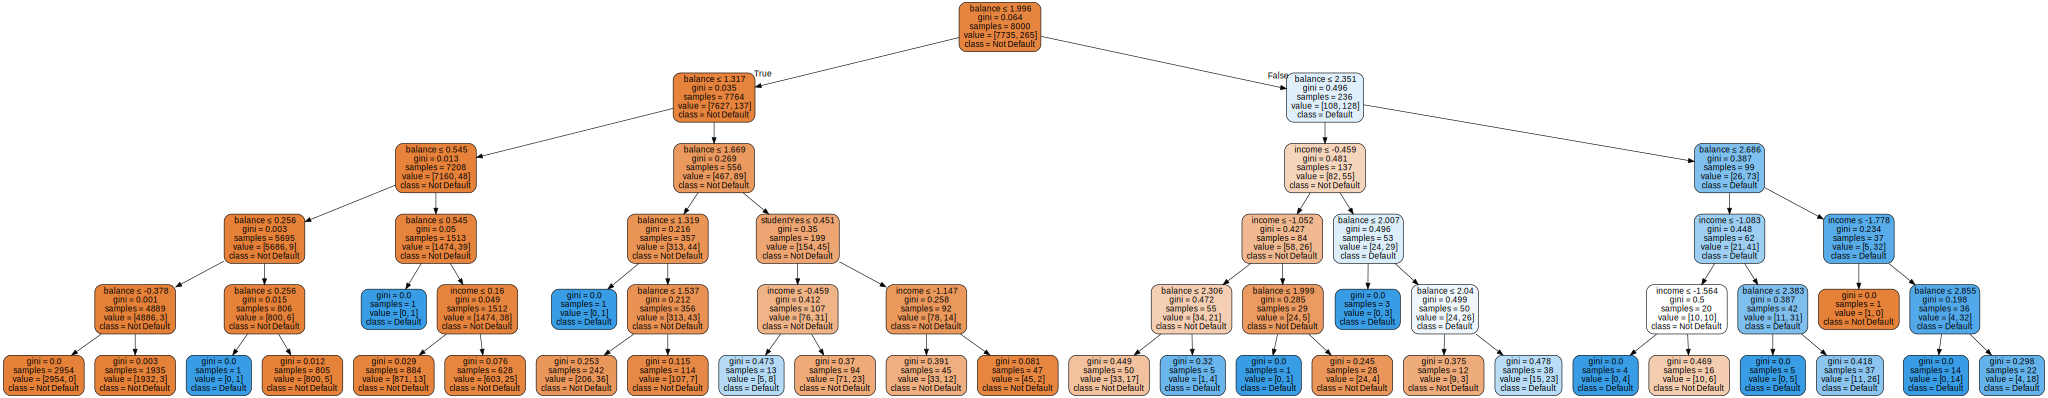

In [404]:
# Classification Tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)

# Plot the classification tree
features = ["balance","income","studentYes"]
class_name = ["Not Default","Default"]
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

8) Find the optimal decision tree depth and compute the AUC ROC. 

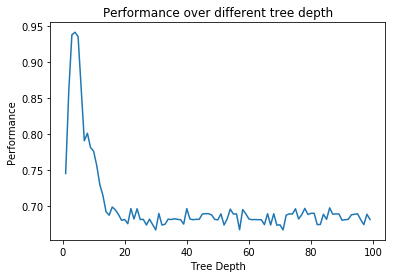

Optimized tree depth: 4.000000
Optimized Performance Score AUC: 0.941747
0.9745


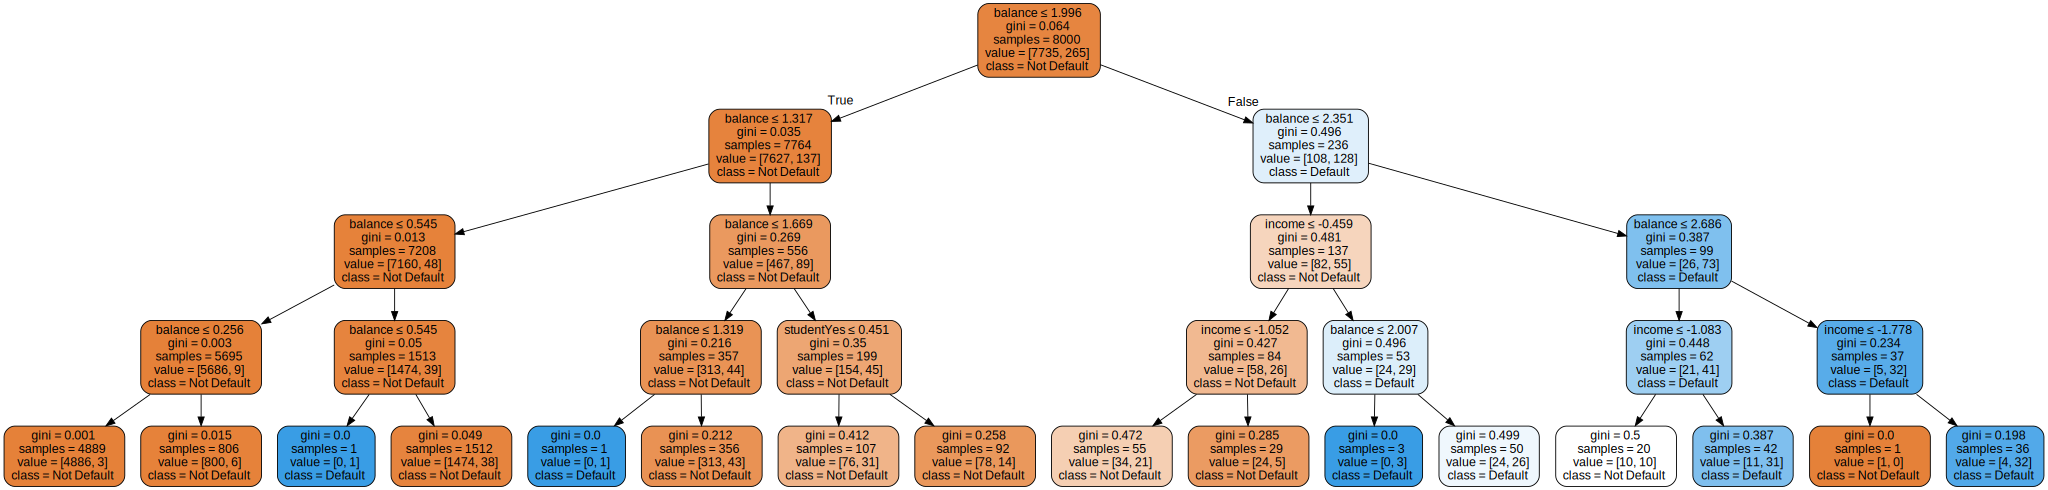

In [405]:
# Optimize the decision tree depth
tree_depths = range(99)+np.ones(99)
scores = []

for  tree_depth in tree_depths:
    clf = tree.DecisionTreeClassifier(max_depth = tree_depth)
    #clf = clf.fit(X_train,y_train)
    #scores.append(clf.score(X_test,y_test))
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    scores.append(auc(fpr, tpr))

# Plot the figures
plt.plot(tree_depths,scores)
plt.xlabel('Tree Depth')
plt.ylabel('Performance')
plt.title('Performance over different tree depth')
plt.show()
Optimal_Depth = tree_depths[scores.index(max(scores))]
# Output the alphas for the with maximum score
print ('Optimized tree depth: %.6f' %Optimal_Depth)
print ('Optimized Performance Score AUC: %.6f' %scores[scores.index(max(scores))])

# Classification Tree
clf = tree.DecisionTreeClassifier(max_depth = Optimal_Depth)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)

# Plot the classification tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph


Area under the ROC curve : 0.941747


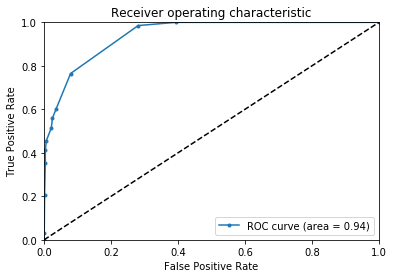

In [406]:
def generate_auc():
    # Construct a kfolds object
    #random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    #n_samples, n_features = X.shape
    #half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = tree.DecisionTreeClassifier(max_depth = Optimal_Depth)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR 
fpr,tpr,roc_auc, thresholds = generate_auc()


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)